<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/FIFA/FIFA_payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON FIFA 선수 이적료 예측 경진대회
대회 사이트: https://dacon.io/competitions/open/235538/data

# 목차
0. 데이터 로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 결론

* 참고



# 0.데이터로드

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!cp /gdrive/MyDrive/Dacon_study/FIFA/FIFA_test.csv ./
!cp /gdrive/MyDrive/Dacon_study/FIFA/FIFA_train.csv ./
!cp /gdrive/MyDrive/Dacon_study/FIFA/submission.csv ./

In [4]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


* id: 선수 고유 아이디
* name: 이름
* age: 나이
* continent : 선수 국적이 포함된 대륙
* contract_until: 선수 계약 기간이 언제까지인지
* position: 선수가 선호하는 포지션 ex) 공격수, 수비수 등
* prefet_foot : 선수가 선호하는 발 ex)오른발
* reputation: 선수가 윰여한 정도 ex) 높은 수치일 수록 유명한 선수
* stat_overall : 선수의 현재 능력치
* stat_potential: 선수가 경험 및 노력을 통해 발전할 수 있는 정도
* stat_skill_moves: 선수의 개인기 능력칙
* value: FIFA가 선정한 선수 이적 시장 가격 (단위:유로)

In [6]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [7]:
print(train.shape)
print(test.shape)

(8932, 12)
(3828, 11)


# 1.데이터 EDA, visualization

In [8]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## data cleansing

In [10]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [11]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

null값 처리 불필요

## 시각화

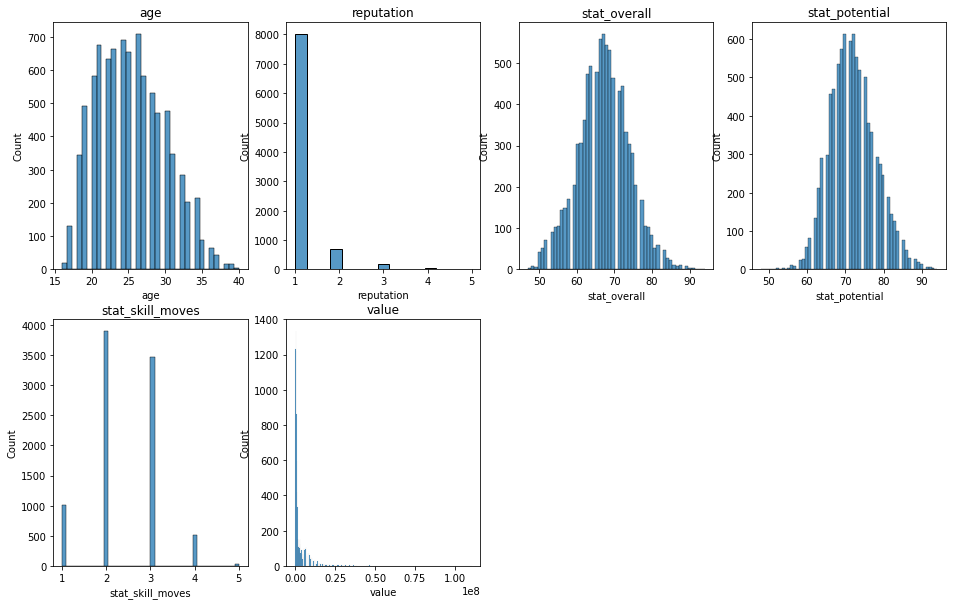

In [17]:
# histplot으로 수치형 데이터 분포 확인
plt.figure(figsize=(16,10))

cols = train.columns[7:].insert(0,'age')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  sns.histplot(train[cols[i]])
plt.show()

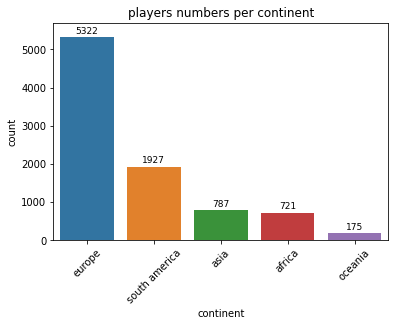

In [15]:
ax= sns.countplot(x='continent',data=train, order = train['continent'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,5700)

plt.xticks(rotation=45)

plt.title('players numbers per continent')
plt.show()

# 2.데이터전처리

# 3.모델생성 및 학습

# 제출

# 4. 결론